In [ ]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# load audio file in the player
audio_path = "/content/piano_c.wav"
ipd.Audio(audio_path)

In [ ]:
# load audio file
signal, sr = librosa.load(audio_path)
signal

array([-3.4512475e-01, -5.7962286e-01, -5.7255304e-01, ...,
        3.0739122e-06, -4.8659481e-06, -7.1212735e-06], dtype=float32)

In [ ]:
sr

22050

In [ ]:
signal.shape

(33968,)

In [ ]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print("One sample last:",sample_duration )

One sample last: 4.5351473922902495e-05


In [ ]:
33968*sample_duration

1.540498866213152

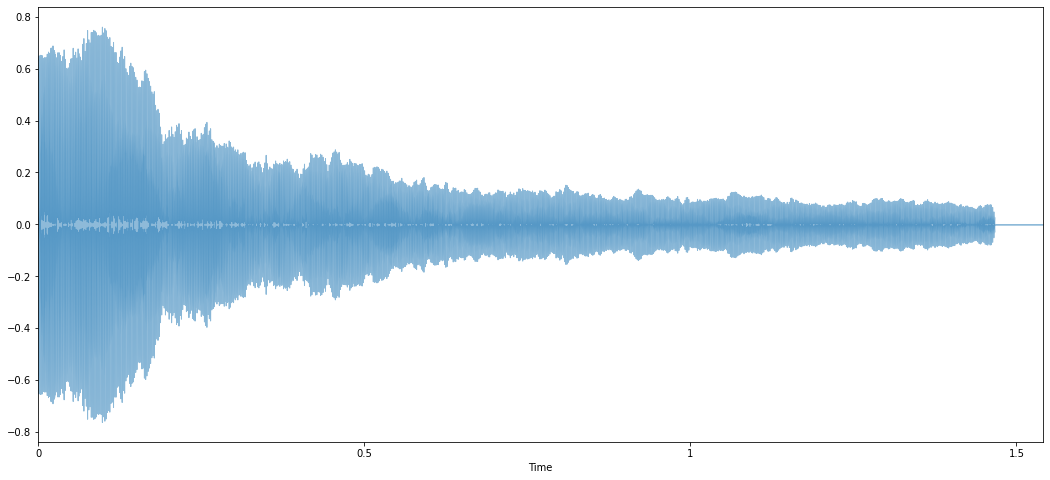

In [ ]:
# plot waveform
plt.figure(figsize=(18, 8))
librosa.display.waveplot(signal, sr=sr, alpha=0.5)
plt.show()

In [ ]:
# derive spectrum using FT
ft = sp.fft.fft(signal)   #sp > scipy
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude)) 

print(ft , magnitude , frequency)

[-42.61859  -0.j        -34.296585 +6.560206j  -29.96304  +7.4250417j ...
 -27.41121 -12.946161j  -29.96304  -7.4250417j -34.296585 -6.560206j ] [42.61859  34.91836  30.869322 ... 30.314642 30.869322 34.91836 ] [0.00000000e+00 6.49159478e-01 1.29831896e+00 ... 2.20487017e+04
 2.20493508e+04 2.20500000e+04]


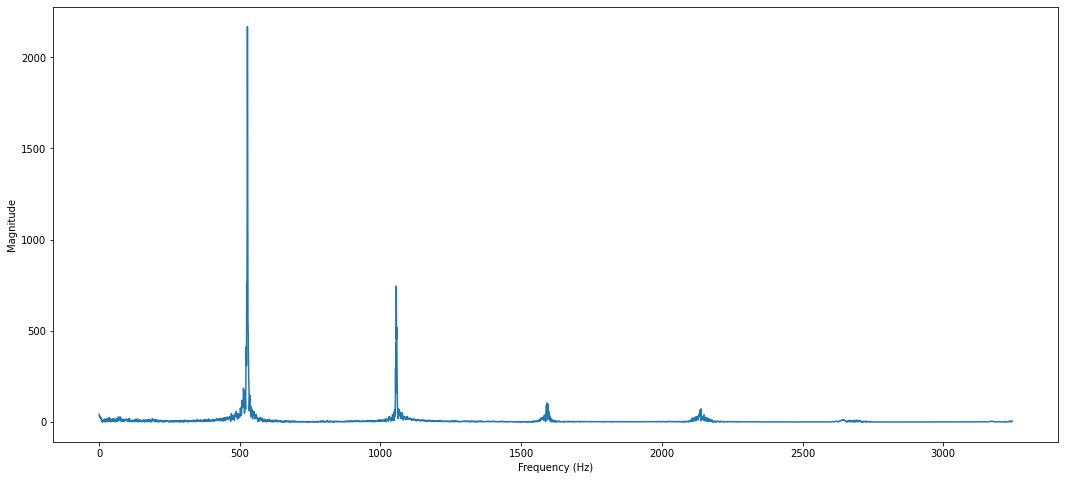

In [ ]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
len(signal)

33968

In [ ]:
signal.shape

(33968,)

In [ ]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print("One sample last:",sample_duration )

One sample last: 4.5351473922902495e-05


In [ ]:
33968*sample_duration

1.540498866213152

In [ ]:
# target zoom in

In [ ]:
# For one cycle
d_523 = 1 / 523
d_523

0.0019120458891013384

In [ ]:
d_400_samples = 400 * sample_duration  # first 400 sample
d_400_samples

0.018140589569160998

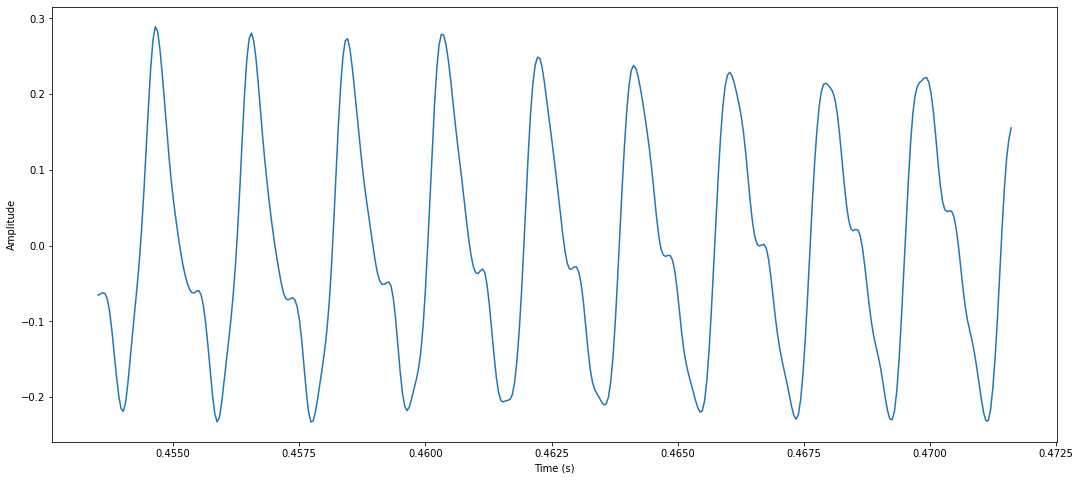

In [ ]:
# zomm in to the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) # consider only 400 sample
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

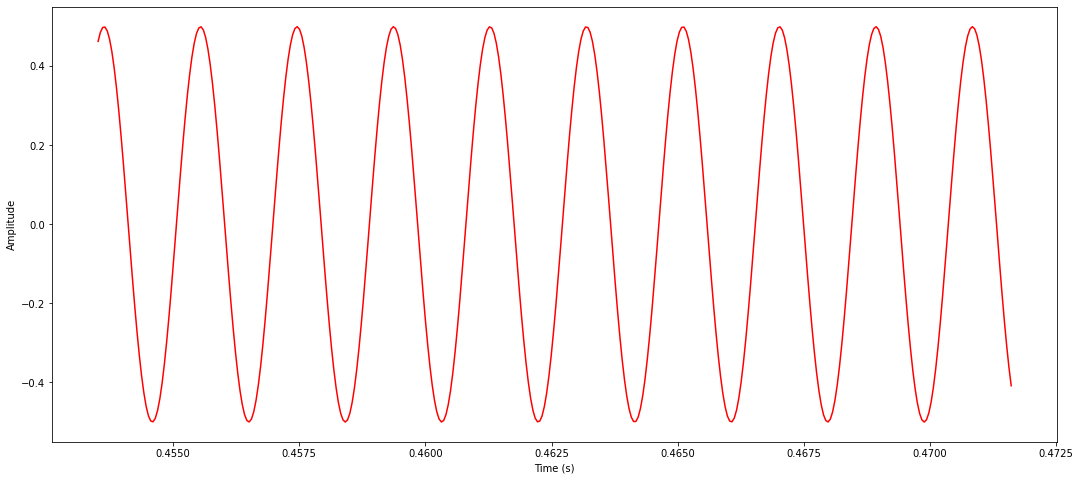

In [ ]:
# sine wave = sin(2*pi(f*t-phase))

# create a sinusoid

f = 523
phase = 0

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

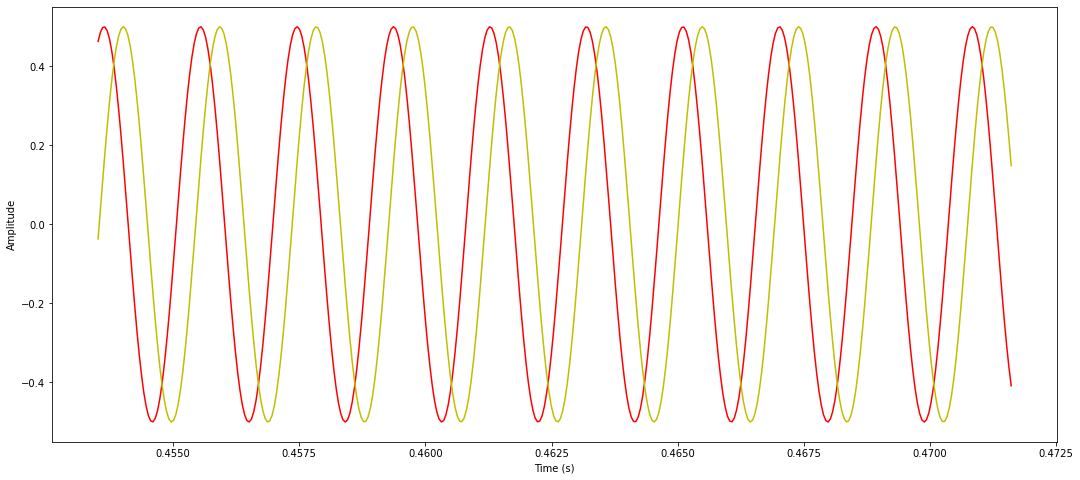

In [ ]:
# create a sinusoid

f = 523 # frequency
phase = 0
phase2 = 0.2

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

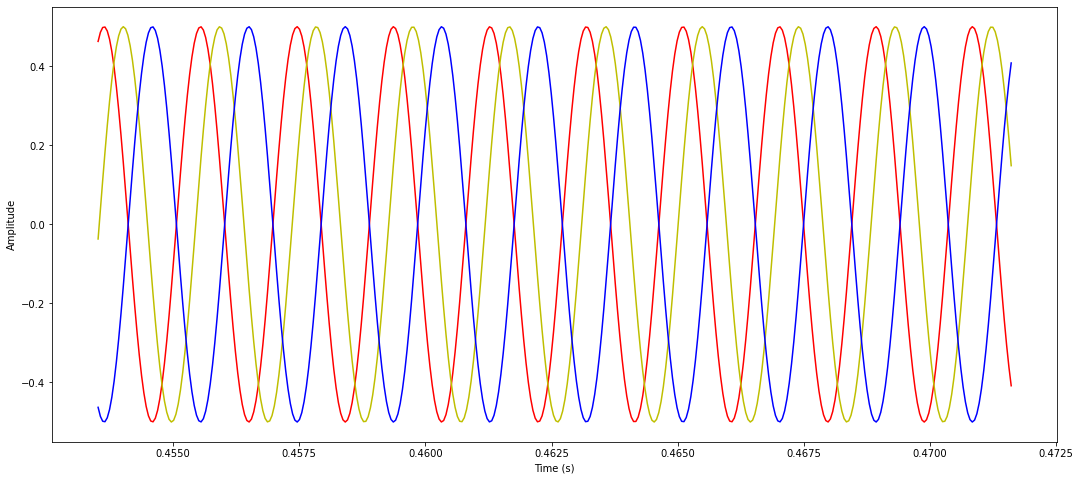

In [ ]:

# create a sinusoid

f = 523 # frequency
phase = 0
phase2 = 0.2
phase3 = 0.5

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))
sin3 = 0.5 * np.sin(2*np.pi * (f * t - phase3))


plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")
plt.plot(t[10000:10400], sin3[10000:10400], color="b")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

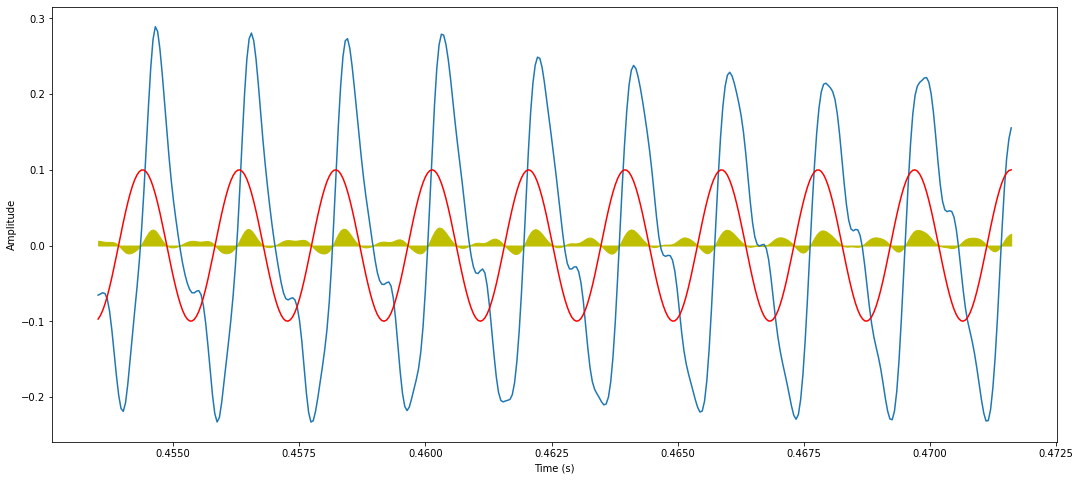

In [ ]:
# compare signal and sinusoids

f = 523
# phase = 0.55
# phase = 0 negative 
phase = 0.4


sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

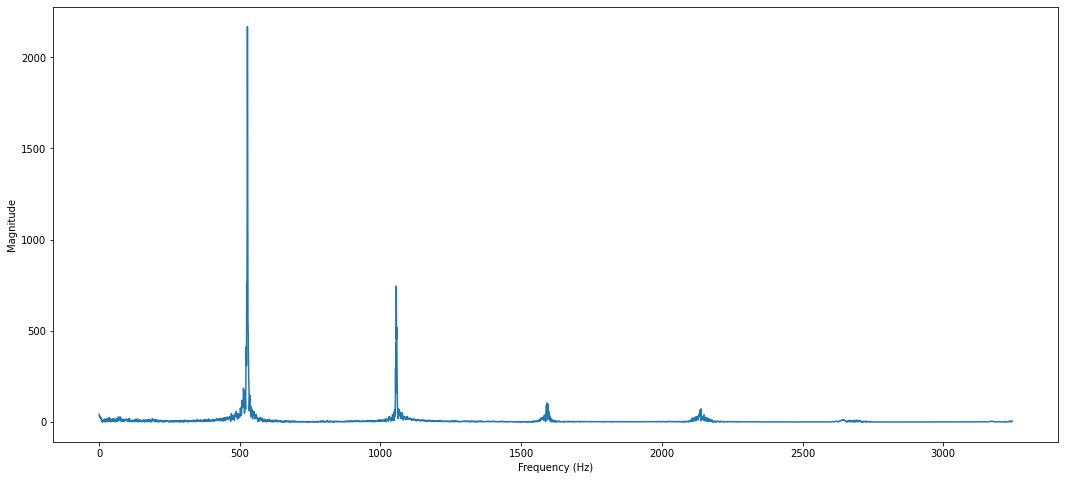

In [ ]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

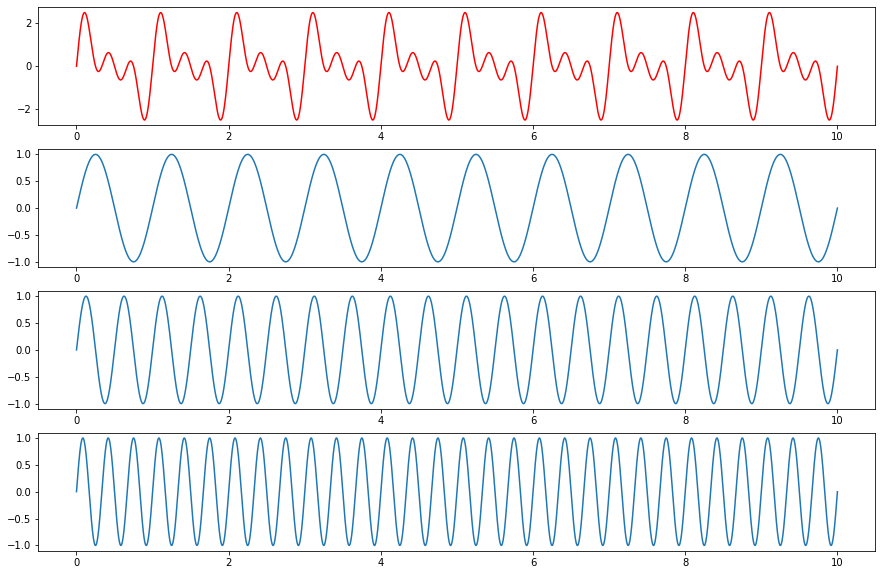

In [ ]:
# superimposing pure tones
f = 1
t = np.linspace(0, 10, 10000)

sin = np.sin(2*np.pi * (f * t))
sin2 = np.sin(2*np.pi * (2*f * t))
sin3 = np.sin(2*np.pi * (3*f * t))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, sum_signal, color="r")

plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)
